In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_csv('ms_bucket.csv',)
data = data.fillna(0) #fill nan
timestamp = data["timestamp"] # array for graphic 


time = np.array(data["timestamp"]) # Being translated to date, Timestamp
for i in range(len(time)):
    data.loc[i, "timestamp"] = datetime.fromtimestamp(time[i])
    

old_columns = np.array(data.columns[2:])# Sorting columns
for i in range(0, len(old_columns)):
    old_columns[i] = int(old_columns[i])
old_columns.sort()
for i in range(0, len(old_columns)):
    old_columns[i] = str(old_columns[i])
y = np.array(["timestamp", "Inf"]) 
old_columns = np.append(y, old_columns)
data = data[old_columns]
data

,timestamp,Inf,1,2,3,4,5,10,20,30,...,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000
0,2019-08-01 12:00:00,88967916.0,56905292.0,62624703.0,67364370.0,68656945.0,69234222.0,72624894.0,82382694.0,85485163.0,...,88967909.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0
1,2019-08-01 12:05:00,88989154.0,56919502.0,62639578.0,67380990.0,68674144.0,69251570.0,72642881.0,82402317.0,85505452.0,...,88989147.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0
2,2019-08-01 12:10:00,89004769.0,56930005.0,62650737.0,67393096.0,68686606.0,69264172.0,72655984.0,82416791.0,85520424.0,...,89004762.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0
3,2019-08-01 12:15:00,89020289.0,56940760.0,62662000.0,67405507.0,68699385.0,69277029.0,72669292.0,82431298.0,85535376.0,...,89020282.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0
4,2019-08-01 12:20:00,89026526.0,56942467.0,62664298.0,67409098.0,68703350.0,69281089.0,72673669.0,82436566.0,85541023.0,...,89026519.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,2019-08-30 11:35:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8348,2019-08-30 11:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8349,2019-08-30 11:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8350,2019-08-30 11:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
arr = np.diff(data.values[:, 2:], axis=1)
arr

array([[5719411.0, 4739667.0, 1292575.0, ..., 0.0, 0.0, 0.0],
       [5720076.0, 4741412.0, 1293154.0, ..., 0.0, 0.0, 0.0],
       [5720732.0, 4742359.0, 1293510.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [7]:
# After compiling of this code, each element (i = 3...33) in the data.columns
# shows that the process was completed in (data.columns[i]-data.columns[i-1]) milliseconds.
# This is done in order to avoid at least some dependence on columns
y = data.columns
for i in range(2, len(data.columns)-1):
    data[y[i+1]] = arr[:, (i-2):(i-1)]
data

,timestamp,Inf,1,2,3,4,5,10,20,30,...,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000
0,2019-08-01 12:00:00,88967916.0,56905292.0,5.71941e+06,4.73967e+06,1.29258e+06,577277,3.39067e+06,9.7578e+06,3.10247e+06,...,11,7,0,0,0,0,0,0,0,0
1,2019-08-01 12:05:00,88989154.0,56919502.0,5.72008e+06,4.74141e+06,1.29315e+06,577426,3.39131e+06,9.75944e+06,3.10314e+06,...,11,7,0,0,0,0,0,0,0,0
2,2019-08-01 12:10:00,89004769.0,56930005.0,5.72073e+06,4.74236e+06,1.29351e+06,577566,3.39181e+06,9.76081e+06,3.10363e+06,...,11,7,0,0,0,0,0,0,0,0
3,2019-08-01 12:15:00,89020289.0,56940760.0,5.72124e+06,4.74351e+06,1.29388e+06,577644,3.39226e+06,9.76201e+06,3.10408e+06,...,11,7,0,0,0,0,0,0,0,0
4,2019-08-01 12:20:00,89026526.0,56942467.0,5.72183e+06,4.7448e+06,1.29425e+06,577739,3.39258e+06,9.7629e+06,3.10446e+06,...,11,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,2019-08-30 11:35:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8348,2019-08-30 11:40:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8349,2019-08-30 11:45:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8350,2019-08-30 11:50:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
arr = np.diff(data.values[:, 2:], axis=1) #Diffrence between times in numbers
arr

In [9]:
y = data.columns #This code makes every element (i=3..33) ii the data.column shows in how much ms costs process
for i in range(2, len(data.columns)-1):# This is done in order to avoid at least some dependence on columns
    data[y[i+1]] = arr[:, (i-2):(i-1)]
data

,timestamp,Inf,1,2,3,4,5,10,20,30,...,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000
0,2019-08-01 12:00:00,88967916.0,56905292.0,5.71941e+06,4.73967e+06,1.29258e+06,577277,3.39067e+06,9.7578e+06,3.10247e+06,...,11,7,0,0,0,0,0,0,0,0
1,2019-08-01 12:05:00,88989154.0,56919502.0,5.72008e+06,4.74141e+06,1.29315e+06,577426,3.39131e+06,9.75944e+06,3.10314e+06,...,11,7,0,0,0,0,0,0,0,0
2,2019-08-01 12:10:00,89004769.0,56930005.0,5.72073e+06,4.74236e+06,1.29351e+06,577566,3.39181e+06,9.76081e+06,3.10363e+06,...,11,7,0,0,0,0,0,0,0,0
3,2019-08-01 12:15:00,89020289.0,56940760.0,5.72124e+06,4.74351e+06,1.29388e+06,577644,3.39226e+06,9.76201e+06,3.10408e+06,...,11,7,0,0,0,0,0,0,0,0
4,2019-08-01 12:20:00,89026526.0,56942467.0,5.72183e+06,4.7448e+06,1.29425e+06,577739,3.39258e+06,9.7629e+06,3.10446e+06,...,11,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,2019-08-30 11:35:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8348,2019-08-30 11:40:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8349,2019-08-30 11:45:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8350,2019-08-30 11:50:00,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
columns = np.array(data.columns[2:]) # Tranlating string to int
for i in range(0, len(columns)):
    columns[i] = int(columns[i])
columns

array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000,
       2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 60000,
       70000, 80000, 90000, 100000, 110000, 120000], dtype=object)

In [18]:
# Getting time intervals for each column
dist = [1]

for i in range(len(columns)-1):
    dist.append(columns[i+1] - columns[i])
dist = np.array(dist)
dist

array([    1,     1,     1,     1,     1,     5,    10,    10,    10,
          10,    50,   100,   100,   100,   100,   500,  1000,  1000,
        1000,  1000,  5000, 10000, 10000, 10000, 10000, 10000, 10000,
       10000, 10000, 10000, 10000, 10000])

In [22]:
x = np.array([[0 for i in range(32)] for i in range(8352)]) # could be used np.zeros(), array of zeros
for k in range(8352):
    x[k]= np.array(data.iloc[k][2:]) / dist # a kind of normalization of each element to get more or less normal weights


middle = []
vect = np.array(data.columns[2:])#times from header
for i in range(0, len(vect)):
    vect[i] = int(vect[i])
vect = vect.reshape(1, 32)


for k in range(8352):
    middle.append(vect * np.array(x[k]))
    middle[k] = middle[k].sum()
    if middle[k] != 0:
        middle[k] = middle[k] / data["Inf"][k]
middle = np.array(middle)
middle

array([1.54793353, 1.54794511, 1.54794341, ..., 0.        , 0.        ,
       0.        ])

In [24]:
std = []
for k in range(8352):
    st = ((vect - middle[k])**2) * np.array(x[k])
    std.append(st.sum())
    if std[k] != 0:
        std[k] = std[k] / data["Inf"][k]
std= np.array(std)
std

array([16.92187848, 16.92288139, 16.92218602, ...,  0.        ,
        0.        ,  0.        ])

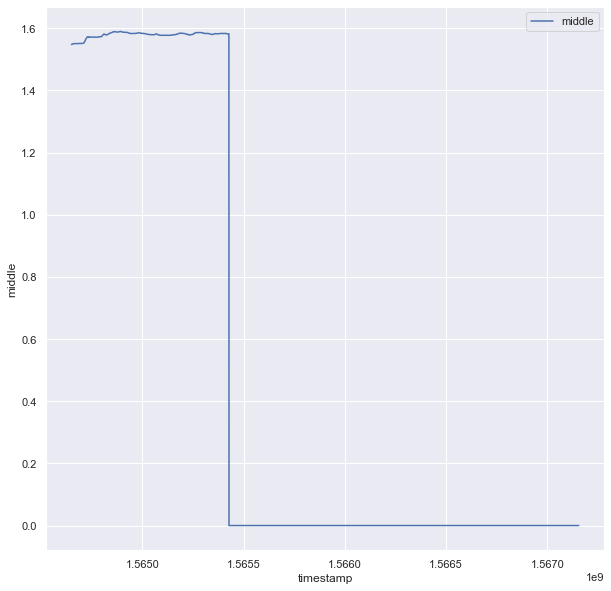

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Setting a fixed size for our charts
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# In order not to clog the output with warnings
import warnings
warnings.filterwarnings('ignore')

plt.plot(timestamp, middle, "-", label = "middle")
plt.xlabel("timestamp")
plt.ylabel("middle")
plt.legend()
plt.show()


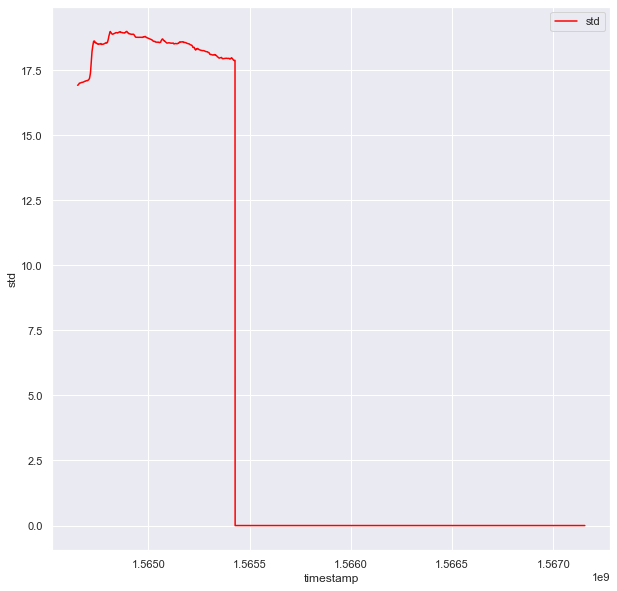

In [28]:
plt.plot(timestamp, std, "-", label = "std",color='red')
plt.xlabel("timestamp")
plt.ylabel("std")
plt.legend()
plt.show()